<a href="https://colab.research.google.com/github/Shreyash0711/Pokmon-Classifier-CNN/blob/main/pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lantian773030/pokemonclassification")

print("Path to dataset files:", path)

100%|██████████| 417M/417M [00:02<00:00, 203MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/lantian773030/pokemonclassification/versions/1


In [3]:
!cp -r "/root/.cache/kagglehub/datasets/lantian773030/pokemonclassification/versions/1/PokemonData" /content/


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

In [8]:
data_dir = "/content/PokemonData"

categories = os.listdir(data_dir)
num_classes = len(categories)
print("Names:", categories)

img_size = 160

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

Names: ['Wartortle', 'Pidgeotto', 'Venusaur', 'Zapdos', 'Golduck', 'Growlithe', 'Ditto', 'Metapod', 'Flareon', 'Vileplume', 'Moltres', 'Magmar', 'Krabby', 'Venonat', 'Poliwrath', 'Clefairy', 'Bulbasaur', 'Charmander', 'Diglett', 'Pinsir', 'Poliwhirl', 'Exeggutor', 'Dodrio', 'Slowpoke', 'Tauros', 'Doduo', 'MrMime', 'Kadabra', 'Vaporeon', 'Ekans', 'Electabuzz', 'Porygon', 'Pidgey', 'Tentacool', 'Mankey', 'Starmie', 'Dratini', 'Arbok', 'Victreebel', 'Zubat', 'Golem', 'Meowth', 'Primeape', 'Seaking', 'Paras', 'Ponyta', 'Scyther', 'Alolan Sandslash', 'Eevee', 'Rhyhorn', 'Hypno', 'Beedrill', 'Voltorb', 'Rattata', 'Kabutops', 'Poliwag', 'Golbat', 'Geodude', 'Vulpix', 'Seel', 'Abra', 'Hitmonlee', 'Pidgeot', 'Marowak', 'Nidorino', 'Ivysaur', 'Parasect', 'Articuno', 'Machop', 'Raichu', 'Kabuto', 'Horsea', 'Charizard', 'Kangaskhan', 'Sandshrew', 'Gyarados', 'Kakuna', 'Machamp', 'Lapras', 'Mew', 'Magnemite', 'Charmeleon', 'Kingler', 'Weepinbell', 'Dragonair', 'Dragonite', 'Oddish', 'Goldeen', 'She

In [9]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 5511 images belonging to 150 classes.
Found 1309 images belonging to 150 classes.


In [10]:
base_model = MobileNetV2(input_shape=(img_size, img_size, 3),
                         include_top=False,
                         weights='imagenet')

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=outputs)

model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 160, 160,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 80, 80,    │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 80, 80,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 80, 80,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 80, 80,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 80, 80,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 80, 80,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 80, 80,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 80, 80,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 81, 81,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 40, 40,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 40, 40,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 40, 40,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 40, 40,    │      2,304 │ block_1_depthwis

 Total params: 2,450,134 (9.35 MB)

 Trainable params: 192,150 (750.59 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [12]:
history1 = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5
)

base_model.trainable = True

for layer in base_model.layers[:100]:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history2 = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

Epoch 1/5
173/173 ━━━━━━━━━━━━━━━━━━━━ 62s 357ms/step - accuracy: 0.9108 - loss: 0.3672 - val_accuracy: 0.8266 - val_loss: 0.6993
Epoch 2/5
173/173 ━━━━━━━━━━━━━━━━━━━━ 78s 338ms/step - accuracy: 0.9178 - loss: 0.3332 - val_accuracy: 0.8235 - val_loss: 0.6838
Epoch 3/5
173/173 ━━━━━━━━━━━━━━━━━━━━ 58s 335ms/step - accuracy: 0.9317 - loss: 0.3059 - val_accuracy: 0.8388 - val_loss: 0.6411
Epoch 4/5
173/173 ━━━━━━━━━━━━━━━━━━━━ 57s 332ms/step - accuracy: 0.9407 - loss: 0.2771 - val_accuracy: 0.8442 - val_loss: 0.6265
Epoch 5/5
173/173 ━━━━━━━━━━━━━━━━━━━━ 59s 341ms/step - accuracy: 0.9336 - loss: 0.2766 - val_accuracy: 0.8350 - val_loss: 0.6213
Epoch 1/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 89s 399ms/step - accuracy: 0.9401 - loss: 0.2670 - val_accuracy: 0.8296 - val_loss: 0.6424
Epoch 2/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 59s 341ms/step - accuracy: 0.9420 - loss: 0.2468 - val_accuracy: 0.8205 - val_loss: 0.6443
Epoch 3/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 58s 334ms/step - accuracy: 0.9507 - loss: 0.2215

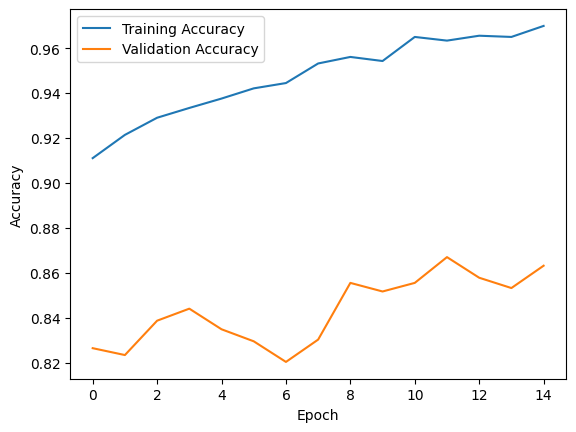

In [13]:
import matplotlib.pyplot as plt

acc = history1.history['accuracy'] + history2.history['accuracy']
val_acc = history1.history['val_accuracy'] + history2.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [21]:
import gradio as gr
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the trained model
model = tf.keras.models.load_model("/content/pokemon_model.h5")

# Get class labels from the training generator (or hardcode your class names list)
class_names = list(train_generator.class_indices.keys())

# Detect the model's expected input shape (height, width)
input_shape = model.input_shape[1:3]  # e.g., (160, 160)

def predict_pokemon(img):
    try:
        if img is None:
            return "No image uploaded!"

        # Resize image to model's input size
        img = img.resize(input_shape)

        # Convert to array and preprocess
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = img_array / 255.0  # Normalize pixel values

        # Predict
        predictions = model.predict(img_array)
        predicted_index = np.argmax(predictions)
        predicted_class = class_names[predicted_index]
        confidence = predictions[0][predicted_index]

        return f"Prediction: {predicted_class} ({confidence*100:.2f}% confidence)"

    except Exception as e:
        return f"Error during prediction: {str(e)}"

# Create Gradio interface
interface = gr.Interface(
    fn=predict_pokemon,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="Pokémon Classifier",
    description="Upload a Pokémon image to classify it."
)

interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4c85060c81913ab91a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [16]:
model.save('/content/pokemon_model.h5')
print("Model saved as pokemon_model.h5")


Model saved as pokemon_model.h5
